# Morfolojik islemler

-Erozyon 
    Erozyonun temel fikri sadece toprak erozyonu gibidir, ön plandaki nesnenin sınırlarını aşındırır.
    
-Genişleme
    Erozyonun tam tersidir. görüntüdeki beyaz bölgeyi arttırır.
    
-Açma
    Erezyon + genişleme işlemidir. Gürültünün giderilmesini sağlar.

-Kapatma
    Kapatma, açma'nın tersidir, Genişleme + erozyon.
    Ön plandaki nesnelerin içindeki küçük delikleri veya nesne üzerindeki küçük siyah noktaları kapatmak için kullanışlıdır.

-Morfolojik Gradyan
    Bir gürültünün genişlemesini ve erozyonu arasındaki farktır. Siyah tuvalin üzerindeki beyaz yazının içerisinin boşaltılması olarak yorumlanabilir. 

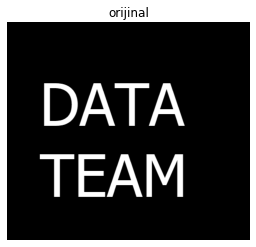

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 495.5, 444.5, -0.5),
 Text(0.5, 1.0, 'orijinal'),
 None)

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("img/team.png",0)
plt.figure(),plt.imshow(img, cmap="gray"),plt.axis("off"),plt.title("orijinal"),plt.show()

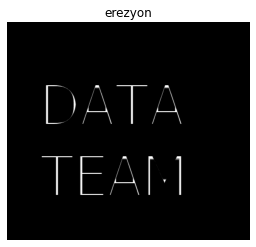

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 495.5, 444.5, -0.5),
 Text(0.5, 1.0, 'erezyon'),
 None)

In [13]:
#erezyon

kernel=np.ones((5,5),dtype=np.uint8)
result=cv2.erode(img, kernel, iterations=2)
plt.figure(),plt.imshow(result, cmap="gray"),plt.axis("off"),plt.title("erezyon"),plt.show()

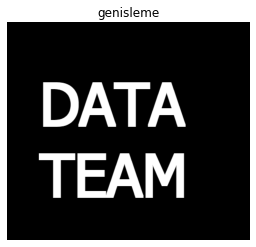

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 495.5, 444.5, -0.5),
 Text(0.5, 1.0, 'genisleme'),
 None)

In [14]:
#genişleme

kernel=np.ones((5,5),dtype=np.uint8)
result2=cv2.dilate(img, kernel, iterations=1)
plt.figure(),plt.imshow(result2, cmap="gray"),plt.axis("off"),plt.title("genisleme"),plt.show()



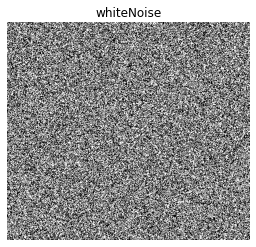

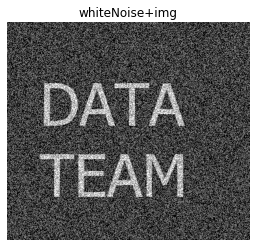

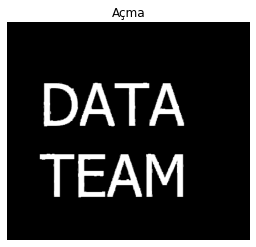

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 495.5, 444.5, -0.5),
 Text(0.5, 1.0, 'Açma'),
 None)

In [16]:
#Açma
#resmimize beyaz bir gürültü ekleyelim 
whiteNoise =  np.random.randint(0,2,size=img.shape[:2])
whiteNoise=whiteNoise*255
plt.figure(),plt.imshow(whiteNoise, cmap="gray"),plt.axis("off"),plt.title("whiteNoise"),plt.show()

#eklediğim gürültülü foto ile kendi fotomu birlestiriyorum 
noise_img=whiteNoise+img
plt.figure(),plt.imshow(noise_img, cmap="gray"),plt.axis("off"),plt.title("whiteNoise+img"),plt.show()

#daha sonra beyz gürültüyü yok edelim
opening=cv2.morphologyEx(noise_img.astype(np.float32), cv2.MORPH_OPEN, kernel)
plt.figure(),plt.imshow(opening, cmap="gray"),plt.axis("off"),plt.title("Açma"),plt.show()

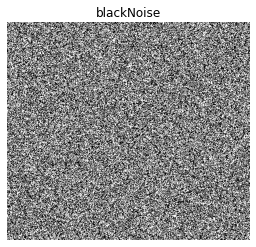

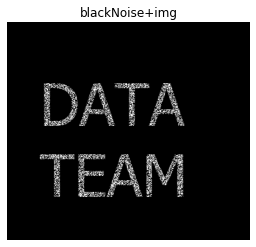

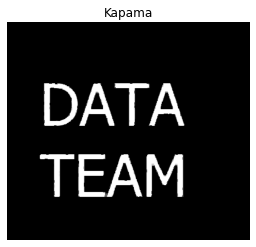

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 495.5, 444.5, -0.5),
 Text(0.5, 1.0, 'Kapama'),
 None)

In [21]:
#kapatma 
#resmimize siyah bir gürültü ekleyelim 
blackNoise =  np.random.randint(0,2,size=img.shape[:2])
blackNoise=whiteNoise*-255
plt.figure(),plt.imshow(blackNoise, cmap="gray"),plt.axis("off"),plt.title("blackNoise"),plt.show()

#eklediğim gürültülü foto ile kendi fotomu birlestiriyorum 
black_noise_img=blackNoise+img
black_noise_img[black_noise_img<=-245]=0
plt.figure(),plt.imshow(black_noise_img, cmap="gray"),plt.axis("off"),plt.title("blackNoise+img"),plt.show()

#daha sonra siyah gürültüyü yok edelim
closing=cv2.morphologyEx(black_noise_img.astype(np.float32), cv2.MORPH_CLOSE, kernel)
plt.figure(),plt.imshow(closing, cmap="gray"),plt.axis("off"),plt.title("Kapama"),plt.show()

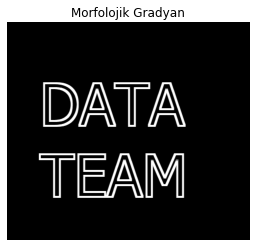

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 495.5, 444.5, -0.5),
 Text(0.5, 1.0, 'Morfolojik Gradyan'),
 None)

In [22]:
#Morfolojik Gradyan
gradient=cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.figure(),plt.imshow(gradient, cmap="gray"),plt.axis("off"),plt.title("Morfolojik Gradyan"),plt.show()